In [1]:
import pandas as pd
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import math


Problem Statement 1: 

In [126]:
input="6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8"
inputList=input.split(' ')
inputList=list(map(int,inputList))
inputList

[6, 7, 5, 7, 7, 8, 7, 6, 9, 7, 4, 10, 6, 8, 8, 9, 5, 6, 4, 8]

In [127]:
inputList_Mean=sum(inputList)/len(inputList)
inputList_Mean

6.85

Problem Statement 2:

In [128]:
data="28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109"

In [129]:
dataList=data.split(',')
dataList=list(map(int,dataList))


In [130]:
dataList_Mean=sum(dataList)/len(dataList)
dataList_Mean

107.51428571428572

Problem Statement 3:

In [131]:
x = np.asarray([0,1,2,3,4,5])
y = np.array([0.09,0.15,0.40,0.25,0.10,0.01])
x.reshape((1,-1))
y.reshape((-1,1))
mean=np.dot(x,y)
variance_of_x=(x-mean)**2
variance = np.dot(variance_of_x.reshape(1,-1),y)
print(f"Mean no. of workouts: {mean}")
print(f"Variance of workouts: {variance}")


Mean no. of workouts: 2.15
Variance of workouts: [1.2275]


Problem Statement 4:
Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (𝑑) =
20𝑒−20(𝑑−12.5), 𝑑 ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm? What is your conclusion regarding the proportion of scraps?

Problem Statement 5:
A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.

Solution- This is a binomial distribution problem , where there are only 2 possible outcomes.

P(F)=0.3
P(G)=0.7

Probability Distribution function is as below

In [132]:
X=list(np.arange(1,7,1))
p=0.3
q=0.7

In [133]:
def bernolliDistribution(input,p,q):
  pdf1=[]
  for i in input:
    pdf1.append((scipy.special.comb(len(input),i)*(p**i)*(q**(len(input)-i))))
  return pdf1
    

In [134]:
resultPDF=bernolliDistribution(X,p,q)


In [135]:
pdf_df=pd.DataFrame({'FaultyCount': X,'PDF_value':resultPDF},)

In [136]:
pdf_df

,FaultyCount,PDF_value
0,1,0.302526
1,2,0.324135
2,3,0.185220
3,4,0.059535
4,5,0.010206
5,6,0.000729


In [137]:
print('Prob. to get 2 faulty bulb out of 6 is {}'.format(pdf_df.at[1,'PDF_value']))

Prob. to get 2 faulty bulb out of 6 is 0.3241349999999999


In [138]:
avgResult=pdf_df.FaultyCount*pdf_df.PDF_value
mean=sum(avgResult)
print('Average Faulty Bulb is {}'.format(mean))

pdf_df['variance']=df['PDF_value']*(df['FaultyCount']-mean)**2
std=np.sqrt(pdf_df['variance'].sum())
print('Standard Deviation of Faulty Bulb Distribution is {}'.format(std))



Average Faulty Bulb is 1.7999999999999996
Standard Deviation of Faulty Bulb Distribution is 0.9374525267980239


Problem 6:
Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to
solve 8 questions per day with a correction rate of 75%, while Barakha averages
around 12 questions per day with a correction rate of 45%. What is the probability
that each of them will solve 5 questions correctly? What happens in cases of 4 and 6
correct solutions? What do you infer from it? What are the two main governing
factors affecting their ability to solve questions correctly? Give a pictorial
representation of the same to validate your answer.

Solution : P(Correct|Gaurav)=0.75
P(InCorrect|Gaurav)=0.25
P(Correct|Barakha)=0.45
P(InCorrect|Barakha)=0.55

In [139]:
p1,q1=0.75,0.25
p2,q2=0.45,0.55
questionsCount_Gaurav=range(1,9)
questionsCount_Barakha=range(1,13)
pdf_Gaurav=bernolliDistribution(questionsCount_Gaurav,p1,q1)
pdf_Barakha=bernolliDistribution(questionsCount_Barakha,p2,q2)

In [140]:
distribution_df_Gaurav=pd.DataFrame({'correct_Question':questionsCount_Gaurav,'pdf_Gaurav':pdf_Gaurav})
distribution_df_Barakha=pd.DataFrame({'correct_Question':questionsCount_Barakha,'pdf_Barakha':pdf_Barakha})

In [141]:
distribution_df_Gaurav

,correct_Question,pdf_Gaurav
0,1,0.000366
1,2,0.003845
2,3,0.023071
3,4,0.086517
4,5,0.207642
5,6,0.311462
6,7,0.266968
7,8,0.100113


In [142]:
distribution_df_Barakha

,correct_Question,pdf_Barakha
0,1,0.007523
1,2,0.033853
2,3,0.092326
3,4,0.169964
4,5,0.222498
5,6,0.212385
6,7,0.148945
7,8,0.076165
8,9,0.027696
9,10,0.006798


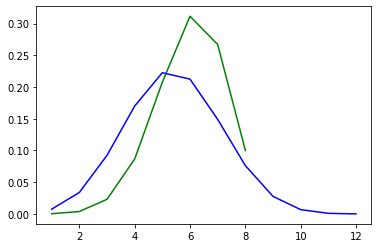

In [143]:
plt.plot(distribution_df_Gaurav.correct_Question,distribution_df_Gaurav.pdf_Gaurav, color='green')
plt.plot(distribution_df_Barakha.correct_Question,distribution_df_Barakha.pdf_Barakha, color='blue')

plt.show()

The two main governing factors affecting their ability to solve questions correctly are-
1.Accuracy to solve each answer 
2.Total number of questions attempted

Problem Statement 7:
Customers arrive at a rate of 72 per hour to my shop. What is the probability of 𝑘
customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c)
more than 3 customers. Give a pictorial representation of the same to validate your
answer.

Solution - Pupulation mean= 72 per hour /n

question being asked in the time frame of 4 minutes thus converting population mean /n

(72/60)*4 =4.8

In [144]:
def poissonDistribution(input,mean):
  result=[]
  for i in input:
    probValue=math.exp(-mean)*((mean**i/math.factorial(i)))
    result.append(probValue)
  return result

In [145]:
case1=[5]
result_a=poissonDistribution(case1,4.8)
print('Prob for 5 customers is {} '.format(result_a[0]))

Prob for 5 customers is 0.1747476836438828 


In [146]:
case2=[0,1,2,3]
result_b=poissonDistribution(case2,4.8)
print('Prob for no more than 3 is {} '.format(sum(result_b)))


Prob for no more than 3 is 0.2942299164965641 


In [147]:
print('Prob for no more than 3 is {} '.format(1-sum(result_b)))

Prob for no more than 3 is 0.705770083503436 


Problem Statement 8:
I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make
reports, where I have the efficiency of entering 77 words per minute with 6 errors per
hour. What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words,
255 words)?
How is the 𝜆 affected?
How does it influence the PMF?
Give a pictorial representation of the same to validate your answer.


In [150]:
# 77 words per minutes
# 6 errors per hour
# 0.1 error per minute
# 0.1 error per 77 words

avgErrorPerWords=0.1/77



Probability to commit 2 error in 455 word

In [153]:
print('The probability to commit 2 errors in a 455-word is {}'.format(poissonDistribution([2],455*avgErrorPerWords)))
print('The probability to commit 2 errors in a 455-word is {}'.format(poissonDistribution([2],1000*avgErrorPerWords)))
print('The probability to commit 2 errors in a 455-word is {}'.format(poissonDistribution([2],255*avgErrorPerWords)))

The probability to commit 2 errors in a 455-word is [0.09669027375144446]
The probability to commit 2 errors in a 455-word is [0.23012815007300153]
The probability to commit 2 errors in a 455-word is [0.039377135392854104]


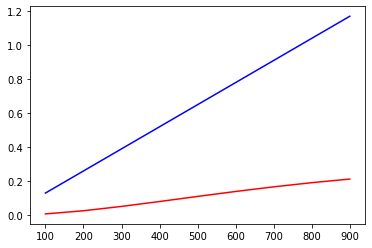

In [159]:
from scipy.stats import poisson
x=range(100,1000,100)
mu=[i*avgErrorPerWords for i in x]

plt.plot(x,poisson.pmf(2,mu),color='red')
plt.plot(x,mu,color='blue')

Prob. of error increases with Total words

Problem Statement 9:
Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF, f(d) =
20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm?
What is the conclusion of this experiment?

Problem 10 : Please compute the following:
a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05
c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99


In [26]:
from scipy.stats import norm
def get_p_value_normal(a,z_score):
  return scipy.integrate.quad(norm.pdf,a,z_score)


In [30]:
# a .  P(Z > 1.26) = 1- P(Z<=1.26)
print('P(Z > 1.26)  is {}'.format(1-get_p_value_normal(-np.inf,1.26)[0]))

P(Z > 1.26)  is 0.10383468112129923


In [37]:
# P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
print('P(Z < −0.86) is {}'.format(get_p_value_normal(-np.inf,-0.86)[0]))
print('P(Z > −1.37) is {}'.format(1-get_p_value_normal(-np.inf,-1.37)[0]))
print('P(−1.25 < Z < 0.37) is {}'.format(get_p_value_normal(-1.25,0.37)[0]))
print('P(Z < −4.6) is {}'.format(get_p_value_normal(-np.inf,-4.6)[0]))

P(Z < −0.86) is 0.19489452125180842
P(Z > −1.37) is 0.914656549178033
P(−1.25 < Z < 0.37) is 0.5386589811336916
P(Z < −4.6) is 2.1124545922985606e-06


b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05

In [45]:
import scipy.stats as st
print('Value of Z for P(Z>z)=0.05 is {}'.format(st.norm.ppf(.95)))
print('Value of Z for 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is {}'.format(abs(st.norm.ppf(.005))))

Value of Z for P(Z>z)=0.05 is 1.6448536269514722
Value of Z for 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.575829303548901


Problem Statement 11:
The current flow in a copper wire follow a normal distribution with a mean of 10 𝑚A
and a variance of 4 (𝑚𝐴)2.
What is the probability that a current measurement will exceed 13 𝑚𝐴? What is the
probability that a current measurement is between 9 and 11mA? Determine the
current measurement which has a probability of 0.98.

Solution -


In [48]:
mean=10
variance=4
std_dev=np.sqrt(variance)

In [50]:
#Z score at 13
val1=(13-mean)/std_dev
val1

1.5

In [53]:
print('Prob of current measurement > 13 mA is {}'.format(1-get_p_value_normal(-np.inf,val1)[0]))

Prob of current measurement > 13 mA is 0.06680720126885797


In [55]:
#The probability that a current measurement is between 9 and 11mA
Z1=(9-mean)/std_dev
Z2=(11-mean)/std_dev
print('Prob of current measurement between 9 and 11mA is {}'.format(get_p_value_normal(Z1,Z2)[0]))

Prob of current measurement between 9 and 11mA is 0.3829249225480263


Problem Statement 12:
The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch
and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓
0.0015 inch. What proportion of shafts are in sync with the specifications? If the
process is centered so that the mean is equal to the target value of 0.2500, what
proportion of shafts conform to the new specifications? What is your conclusion from
this experiment?


In [56]:
mean=0.2508
st_dev=0.0005

In [59]:
Z1=((0.2500-0.0015)-mean)/st_dev
Z2=((0.2500+0.0015)-mean)/st_dev
prob1=get_p_value_normal(Z1,Z2)[0]
print('proportion of shafts are in sync with the old specifications is {}'.format(prob1))

0.9192412283115201

In [60]:
mean=0.2500
st_dev=0.0005

In [61]:
Z1=((0.2500-0.0015)-mean)/st_dev
Z2=((0.2500+0.0015)-mean)/st_dev
prob2=get_p_value_normal(Z1,Z2)[0]
print('proportion of shafts are in sync with the new  specifications is {}'.format(prob2))

proportion of shafts are in sync with the new  specifications is 0.9973002039367398
